# AFL259

something weird is going on with the dates here, so I'm going to examine more closely

ok, looks like this already only contains daily average for the well depth, so I'm just going to consolidate and pickle in this notebook since it's slightly different than what we need in the existing data-consolidation nb

In [1]:
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pytz

In [2]:
raw_well_data = '../../EIM-data-AFL259/GroundwaterSummarizedTimeSeriesResults_2023Oct23_31936.csv'
## note: AFL259 data is too large to upload to github so it's stored on my personal computer
final_pickle = '../data/pickled_data/AFL259_all_data.pkl'
short_pickle = '../data/pickled_data/AFL259_short.pkl'

In [3]:
## Load raw data
level_data = pd.read_csv(raw_well_data,
                         low_memory=False)
display(level_data)

,Study_ID,Study_Name,Location_ID,Study_Specific_Location_ID,Location_Name,Well_Tag_ID,Instrument_ID,Field_Collection_Type,Field_Collector,Time_Zone,...,Calculated_Longitude_Decimal_Degrees_NAD83HARN,Calculated_Land_Surface_Elevation_NAVD88_FT,Calculated_Water_Level_Elevation_NAVD88_FT,Calculated_Water_Level_Elevation_Accuracy_FT,Calculated_Water_Level_Depth_Below_Land_Surface_FT,Result_Accuracy,Result_Accuracy_Description,Study_ID_Alias,Record_Created_On,Calculated_Result_System_ID
0,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,NaN,+/- 1 ft (0.3 m),NaN,NaN,NaN,NaN,9/26/2018 2:11:30 AM,943268028
1,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,NaN,+/- 1 ft (0.3 m),NaN,NaN,NaN,NaN,9/26/2018 2:11:30 AM,943268056
2,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,NaN,+/- 1 ft (0.3 m),NaN,NaN,NaN,NaN,9/26/2018 2:11:30 AM,943268064
3,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,NaN,+/- 1 ft (0.3 m),NaN,NaN,NaN,NaN,9/26/2018 2:11:30 AM,943268079
4,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,NaN,+/- 1 ft (0.3 m),NaN,NaN,NaN,NaN,9/26/2018 2:11:30 AM,943268080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31931,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,1966.695417,+/- 1 ft (0.3 m),89.674583,WL1,Water level accurate to +/- 0.1ft,NaN,9/26/2018 2:11:30 AM,943521954
31932,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,1964.767083,+/- 1 ft (0.3 m),91.602917,WL1,Water level accurate to +/- 0.1ft,NaN,9/26/2018 2:11:30 AM,943521971
31933,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,1967.685000,+/- 1 ft (0.3 m),88.685000,WL1,Water level accurate to +/- 0.1ft,NaN,9/26/2018 2:11:30 AM,943521972
31934,EROGWDB,Ecology Eastern Regional Office Groundwater Da...,AFL259,AFL259,Lynden @ CID,AFL259,63101,Measurement,WA Dept of Ecology,PDT - Pacific Daylight Time (GMT-7),...,-117.1011,2056.37,1967.445417,+/- 1 ft (0.3 m),88.924583,WL1,Water level accurate to +/- 0.1ft,NaN,9/26/2018 2:11:30 AM,943521980


In [4]:
level_data.nunique()

Study_ID                                                  1
Study_Name                                                1
Location_ID                                               1
Study_Specific_Location_ID                                1
Location_Name                                             1
Well_Tag_ID                                               1
Instrument_ID                                             1
Field_Collection_Type                                     1
Field_Collector                                           1
Time_Zone                                                 1
Field_Collection_Start_Date_Time                      18204
Field_Collection_End_Date_Time                         4564
Field_Collection_Reference_Point                          0
Field_Collection_Upper_Depth                              0
Field_Collection_Lower_Depth                              0
Field_Collection_Depth_Units                              0
Sample_Matrix                           

In [5]:
display(level_data['Result_Parameter_Name'])
level_data['Result_Parameter_Name'][31935]

0                   Temperature, water (7-day rolling max)
1                   Temperature, water (7-day rolling max)
2                   Temperature, water (7-day rolling max)
3                   Temperature, water (7-day rolling max)
4                   Temperature, water (7-day rolling max)
                               ...                        
31931    Water level in well (depth below measuring poi...
31932    Water level in well (depth below measuring poi...
31933    Water level in well (depth below measuring poi...
31934    Water level in well (depth below measuring poi...
31935    Water level in well (depth below measuring poi...
Name: Result_Parameter_Name, Length: 31936, dtype: object

'Water level in well (depth below measuring point, daily average)'

In [6]:
level_data['Result_Parameter_Name'].unique()

array(['Temperature, water (7-day rolling max)',
       'Temperature, water (daily average)',
       'Water level in well (depth below measuring point, daily minimum)',
       'Temperature, water (daily maximum)',
       'Water level in well (depth below measuring point, daily maximum)',
       'Temperature, water (daily minimum)',
       'Water level in well (depth below measuring point, daily average)'],
      dtype=object)

In [7]:
## Restrict the data to rows where Result_Parameter_Name=='Water level in well (depth below measuring point)'
level_data = level_data.loc[level_data['Result_Parameter_Name']=='Water level in well (depth below measuring point, daily average)']
level_data = level_data.rename(columns={'Result_Value':'avg_well_depth'})

In [8]:
level_data[['Field_Collection_Start_Date_Time','Field_Collection_End_Date_Time','avg_well_depth']].sort_values(by='Field_Collection_Start_Date_Time')

,Field_Collection_Start_Date_Time,Field_Collection_End_Date_Time,avg_well_depth
30587,1/1/2007 12:00:00 AM,1/1/2007 11:00:00 PM,91.3104
30691,1/1/2008 12:00:00 AM,1/1/2008 11:00:00 PM,92.9667
28385,1/1/2009 12:00:00 AM,1/1/2009 11:00:00 PM,92.1404
29169,1/1/2010 12:00:00 AM,1/1/2010 11:00:00 PM,93.6829
29179,1/1/2011 12:00:00 AM,1/1/2011 11:00:00 PM,88.8871
...,...,...,...
27880,9/9/2013 12:00:00 AM,9/9/2013 11:00:00 PM,91.0637
27545,9/9/2014 12:00:00 AM,9/9/2014 11:00:00 PM,91.6121
29693,9/9/2015 12:00:00 AM,9/9/2015 11:00:00 PM,95.3604
30258,9/9/2016 12:00:00 AM,9/9/2016 11:00:00 PM,92.9975


In [9]:
type(level_data['Field_Collection_Start_Date_Time'][30587])

str

In [10]:
level_data['Field_Collection_Start_Date_Time'] = pd.to_datetime(
                                                    level_data['Field_Collection_Start_Date_Time'],
                                                    format='%m/%d/%Y %H:%M:%S %p', utc=False)

level_data['Field_Collection_End_Date_Time'] = pd.to_datetime(
                                                    level_data['Field_Collection_End_Date_Time'],
                                                    format='%m/%d/%Y %H:%M:%S %p', utc=False)

level_data[['Field_Collection_Start_Date_Time','Field_Collection_End_Date_Time','avg_well_depth']].sort_values(by='Field_Collection_Start_Date_Time')

,Field_Collection_Start_Date_Time,Field_Collection_End_Date_Time,avg_well_depth
31314,2005-08-21 12:00:00,2005-08-21 11:00:00,99.0592
30127,2005-08-22 12:00:00,2005-08-22 11:00:00,99.1633
28209,2005-08-23 12:00:00,2005-08-23 11:00:00,99.1550
31916,2005-08-24 12:00:00,2005-08-24 11:00:00,99.1004
30362,2005-08-25 12:00:00,2005-08-25 11:00:00,99.1475
...,...,...,...
31315,2018-06-02 12:49:00,2018-06-02 11:11:00,79.4696
29569,2018-06-03 12:12:00,2018-06-03 11:35:00,80.0721
29092,2018-06-04 12:36:00,2018-06-04 11:59:00,80.4046
28410,2018-06-05 01:00:00,2018-06-05 11:22:00,80.6565


In [11]:
level_data['date'] = level_data['Field_Collection_End_Date_Time'].dt.date

In [12]:
level_data = level_data.drop_duplicates('date')[['date','avg_well_depth']].sort_values(by='date')
level_data.reset_index(inplace=True, drop=True)

In [13]:
level_data

,date,avg_well_depth
0,2005-08-21,99.0592
1,2005-08-22,99.1633
2,2005-08-23,99.1550
3,2005-08-24,99.1004
4,2005-08-25,99.1475
...,...,...
4559,2018-06-02,79.4696
4560,2018-06-03,80.0721
4561,2018-06-04,80.4046
4562,2018-06-05,80.6565


<Axes: xlabel='date'>

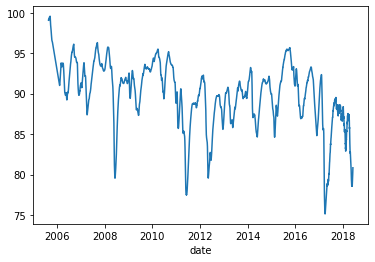

In [14]:
level_data.set_index(level_data.date, inplace=True)
level_data.avg_well_depth.plot()

In [15]:
level_data.reset_index(inplace=True, drop=True)
level_data

,date,avg_well_depth
0,2005-08-21,99.0592
1,2005-08-22,99.1633
2,2005-08-23,99.1550
3,2005-08-24,99.1004
4,2005-08-25,99.1475
...,...,...
4559,2018-06-02,79.4696
4560,2018-06-03,80.0721
4561,2018-06-04,80.4046
4562,2018-06-05,80.6565


## Surface water and weather data


Marcos already pickled the relevant dataframes so I can just read them in and then merge

In [16]:
sw_data_gage_ht = pd.read_pickle('../data/pickled_data/sw_data_gage_ht.pkl')
sw_data_discharge_cfs = pd.read_pickle('../data/pickled_data/sw_data_discharge_cfs.pkl')
noaa_data = pd.read_pickle('../data/pickled_data/noaa_data.pkl')
wx_data = pd.read_pickle('../data/pickled_data/wx_data.pkl')

In [17]:
all_data = level_data.merge(sw_data_gage_ht, how='outer', on='date')
all_data = all_data.merge(sw_data_discharge_cfs, how='outer', on='date')
all_data = all_data.merge(noaa_data, how='outer', on='date')
all_data = all_data.merge(wx_data, how='outer', on='date')
all_data = all_data.sort_values('date')

## Make the index `nice`:
all_data = all_data.reset_index(drop=True)

In [18]:
all_data

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,1900-10-21,NaN,NaN,2410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-10-22,NaN,NaN,2750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-10-23,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-10-24,NaN,NaN,3280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-10-25,NaN,NaN,3460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44921,2023-10-17,NaN,17.94,1470.0,NaN,53.655000,61.41,43.72,1020.958333,61.208333,80.0,40.0,9.831667,18.41,0.00,0.0,0.0,0.0
44922,2023-10-18,NaN,17.95,1480.0,NaN,55.562083,72.59,42.53,1021.166667,58.708333,83.0,28.0,5.322917,10.36,0.00,0.0,0.0,0.0
44923,2023-10-19,NaN,17.95,1480.0,NaN,57.589167,76.69,42.44,1017.958333,62.375000,87.0,34.0,7.910417,16.11,0.00,0.0,0.0,0.0
44924,2023-10-20,NaN,17.94,1470.0,NaN,59.808750,75.16,46.81,1015.375000,61.458333,76.0,40.0,6.279583,8.05,3.44,0.0,0.0,0.0


In [19]:
# a date to datetime fix

## Make the dates `nice`:
## check the first and last date from above and make sure the number of
## days matches so there are no missing days
date_rng = pd.date_range(start='1900-10-21', end='2023-10-21', freq='D')
all_data['date'] = date_rng

In [20]:
# truncating the data to the relevant dates
# this may depend on the well, but I'm relatively sure that
# these dates are included for all of our wells of interest
min_date = datetime(2006,2,7)
max_date = datetime(2018,6,6)
df_short = all_data.loc[(all_data.date >= min_date) & (all_data.date <= max_date)].copy()

In [21]:
## pickle the full data and the short version
all_data.to_pickle(final_pickle)
df_short.to_pickle(short_pickle)